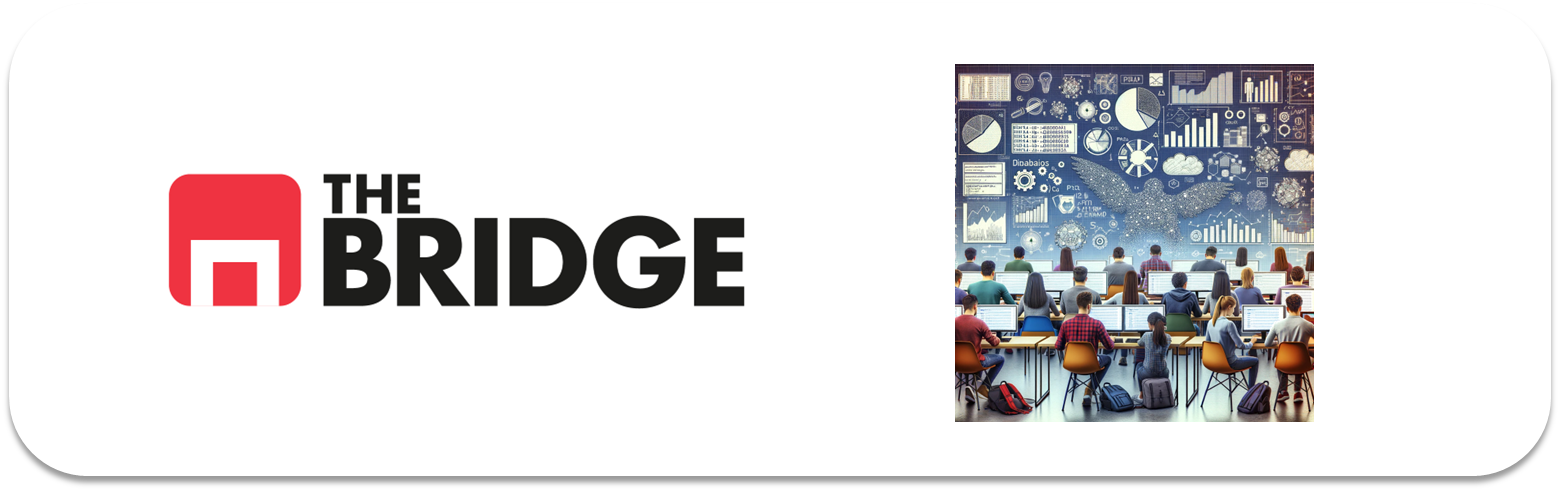

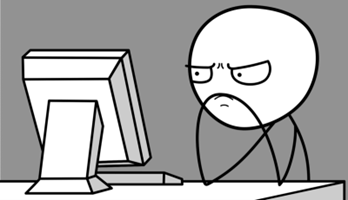

Para ejercitarte y afianzar lo aprendido sobre **Proceso de Datos**, como primera etapa de ML, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

file_path = r"C:\Users\hp\Desktop\Python Scripts\advertising_ml.csv"

### Ejercicio 1

Carga el dataset de advertising que encontrarás en la carpeta de datos. Muestra su información general. ¿Qué te llama la atención? ¿Tendremos que limpiar alguna variable?

In [2]:
try:
    data = pd.read_csv(file_path)
    print("Dataset cargado exitosamente.")
    print("Primeras 5 filas del dataset:")
    print(data.head())  # Muestra las primeras 5 filas para verificar la carga
    print("\nColumnas del dataset:")
    print(data.columns)  # Muestra las columnas disponibles
except FileNotFoundError:
    print(f"No se encontró el archivo en la ruta: {file_path}. Verifica la ubicación.")
except Exception as e:
    print(f"Ocurrió un error al cargar el dataset: {e}")

Dataset cargado exitosamente.
Primeras 5 filas del dataset:
   Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  \
0                     68.95  35 years     61833.90                256.09   
1                     80.23  31 years     68441.85                193.77   
2                     69.47  26 years     59785.94                236.50   
3                     74.15  29 years     54806.18                245.89   
4                     68.37   35 años     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             T

### Ejercicio 2

Tenemos que entender el problema antes de seguir. Nos dicen que la compañía "QuickRespond" quiere poder generar un modelo que a partir de datos como los del dataset para poder dirigir mejor su campaña de anuncios. Hablando con ellos llegamos a la conclusión de que queremos un modelo para poder predecir si un usuario pulsará en el link de un anuncio o no. ¿Qué tipo de problemas estamos tratando?¿Y de que tipo de aprendizaje?¿Existe una variable target que puedas identificar rapidamente?

Análisis del problema
¿Qué tipo de problema estamos tratando?
Tipo de problema: Clasificación

El problema se enfoca en predecir si un usuario hará clic en el enlace de un anuncio o no. Esto implica una salida binaria o categórica, generalmente etiquetada como:
1: Usuario hizo clic en el anuncio.
0: Usuario no hizo clic en el anuncio.
Motivo: El modelo debe decidir entre dos clases (clic o no clic), lo que lo clasifica como un problema de clasificación supervisada binaria.

¿De qué tipo de aprendizaje estamos hablando?
Tipo de aprendizaje: Aprendizaje supervisado
En este caso, contamos con datos etiquetados, es decir, ya sabemos si los usuarios hicieron clic o no en los anuncios en el dataset proporcionado.
El modelo aprende a partir de los ejemplos etiquetados para predecir el resultado de nuevos datos no vistos.

¿Existe una variable target que puedas identificar rápidamente?

Sí, la variable target (o dependiente) es la que queremos predecir: "clic en el enlace del anuncio".
En el dataset, suele estar representada por columnas con nombres como:
Clicked on Ad
Clicked
Is_Clicked


In [3]:

# Verificar las columnas disponibles
print("Columnas del dataset:", data.columns)



Columnas del dataset: Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')


Resumen:
Tipo de problema: Clasificación binaria.
Tipo de aprendizaje: Supervisado.
Variable target: La columna que indica si el usuario hizo clic en el anuncio (ejemplo: Clicked on Ad).

### Ejercicio 3

Volvamos ya a los datos. Intenta dar una definicón de cada columna, obten su cardinalidad y en función de esta y del tipo de variable de pandas, clasifícalas en categóricas y numéricas.

In [4]:
# Analizar las columnas del dataset
columnas = data.columns

# Crear un DataFrame para guardar resultados
resultados = []

for columna in columnas:
    # Definir cada columna
    tipo_pandas = data[columna].dtype  # Tipo de dato según pandas
    cardinalidad = data[columna].nunique()  # Número de valores únicos

    # Clasificar como categórica o numérica
    if tipo_pandas == 'object' or cardinalidad < 10:  # Cardinalidad baja puede indicar categórica
        tipo_variable = 'Categórica'
    else:
        tipo_variable = 'Numérica'

    # Guardar los resultados
    resultados.append({
        'Columna': columna,
        'Tipo_Pandas': tipo_pandas,
        'Cardinalidad': cardinalidad,
        'Clasificación': tipo_variable
    })

# Crear un DataFrame para mostrar
df_resultados = pd.DataFrame(resultados)

# Mostrar resultados
print("\nAnálisis de las columnas:")
print(df_resultados)



Análisis de las columnas:
                    Columna Tipo_Pandas  Cardinalidad Clasificación
0  Daily Time Spent on Site     float64           900      Numérica
1                       Age      object            83    Categórica
2               Area Income     float64          1000      Numérica
3      Daily Internet Usage     float64           966      Numérica
4             Ad Topic Line      object          1000    Categórica
5                      City      object           969    Categórica
6                      Male       int64             2    Categórica
7                   Country      object           237    Categórica
8                 Timestamp      object          1000    Categórica
9             Clicked on Ad       int64             2    Categórica


### Ejercicio 4

Limpia las columnas que necesiten ser limpiadas, no completes nulos (porque asignar valores a nulos sólo puedes hacerlo primero con el train, ya explicaremos con detalle por qué). 

In [5]:
# Mostrar las primeras filas del dataset para identificar problemas iniciales
print("Primeras filas del dataset:")
print(data.head())

# Revisar información general del dataset
print("\nInformación general del dataset:")
print(data.info())

# Revisar estadísticas básicas de las columnas numéricas
print("\nEstadísticas descriptivas:")
print(data.describe(include='all'))

# Identificar columnas con valores nulos
print("\nNúmero de valores nulos por columna:")
print(data.isnull().sum())

# ---- Limpieza de columnas ----
# Crear un nuevo DataFrame limpio basado en los problemas encontrados
data_limpio = data.copy()

# 1. Eliminar columnas irrelevantes o redundantes
# (Por ejemplo: columnas con IDs o valores constantes)
columnas_a_eliminar = [col for col in data.columns if data[col].nunique() <= 1]  # Columnas constantes
data_limpio.drop(columns=columnas_a_eliminar, inplace=True)
print(f"\nColumnas eliminadas por ser irrelevantes o constantes: {columnas_a_eliminar}")

# 2. Verificar nombres de columnas para estandarización
data_limpio.columns = [col.strip().lower().replace(' ', '_') for col in data_limpio.columns]
print("\nNombres de columnas estandarizados:")
print(data_limpio.columns)

# 3. Identificar valores extremos en columnas numéricas (opcional)
# (Por ejemplo: valores fuera de rangos lógicos como edades negativas o ingresos exagerados)
for col in data_limpio.select_dtypes(include=['int64', 'float64']).columns:
    print(f"\nColumna {col} - Valores extremos posibles:")
    print(data_limpio[col][(data_limpio[col] < 0) | (data_limpio[col] > data_limpio[col].quantile(0.99))])

# Mantener los valores nulos intactos pero marcarlos
print("\nValores nulos en el dataset limpio:")
print(data_limpio.isnull().sum())

# Mostrar resumen del dataset limpio
print("\nDataset limpio:")
print(data_limpio.info())


Primeras filas del dataset:
   Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  \
0                     68.95  35 years     61833.90                256.09   
1                     80.23  31 years     68441.85                193.77   
2                     69.47  26 years     59785.94                236.50   
3                     74.15  29 years     54806.18                245.89   
4                     68.37   35 años     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  201

### Ejercicio 5

Divide el datset en train y test, empleando sklearn para ello tal y como hemos hecho en el workout. Usa la regla del 80-20

In [6]:
from sklearn.model_selection import train_test_split

# Separar características (X) y variable target (y)
# Suponemos que la variable target es 'clicked_on_ad' (reemplázala con el nombre real)
X = data_limpio.drop(columns=['clicked_on_ad'])  # Características
y = data_limpio['clicked_on_ad']  # Variable target

# Dividir en train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar tamaños de los conjuntos
print("Tamaños de los conjuntos:")
print(f"Train (X_train): {X_train.shape}")
print(f"Train (y_train): {y_train.shape}")
print(f"Test (X_test): {X_test.shape}")
print(f"Test (y_test): {y_test.shape}")


Tamaños de los conjuntos:
Train (X_train): (800, 9)
Train (y_train): (800,)
Test (X_test): (200, 9)
Test (y_test): (200,)


### Ejercicio 6

Haz un pequeño análisis univariante de las columnas numéricas (muestra sus histogramas)

Análisis univariante: Histogramas de columnas numéricas


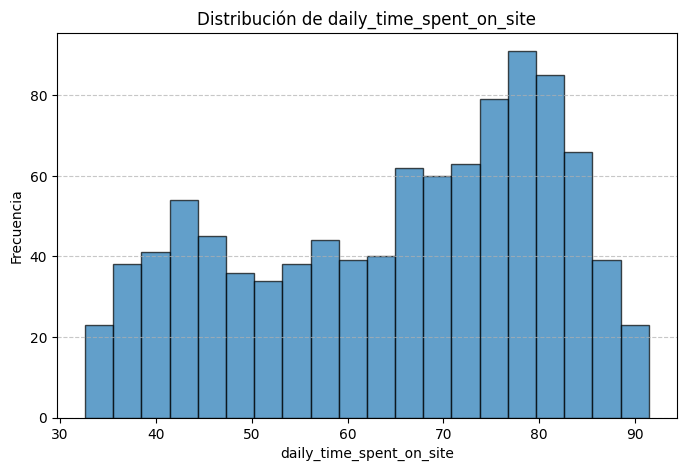

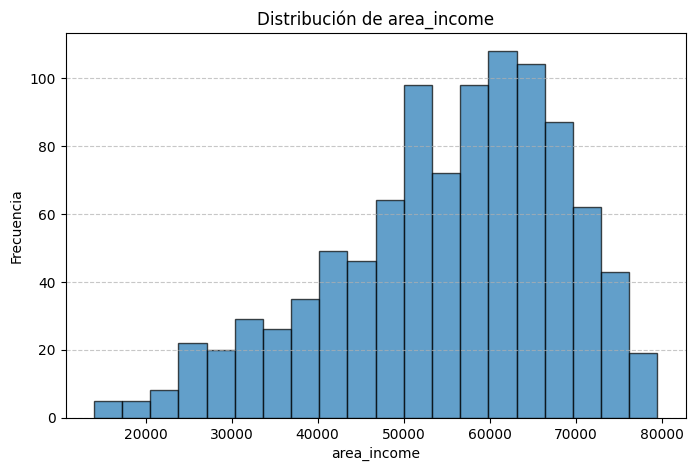

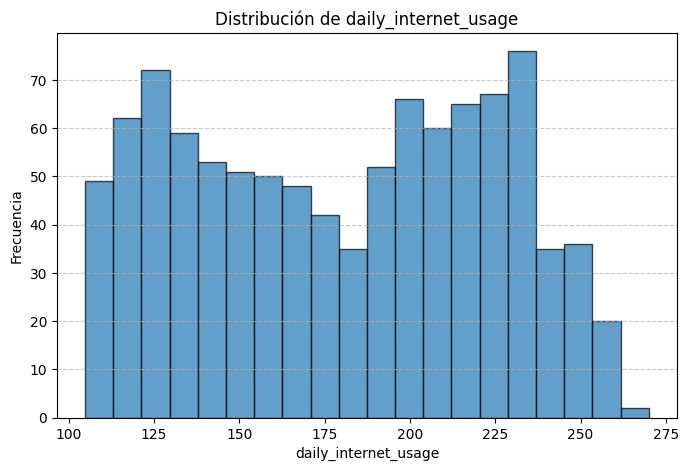

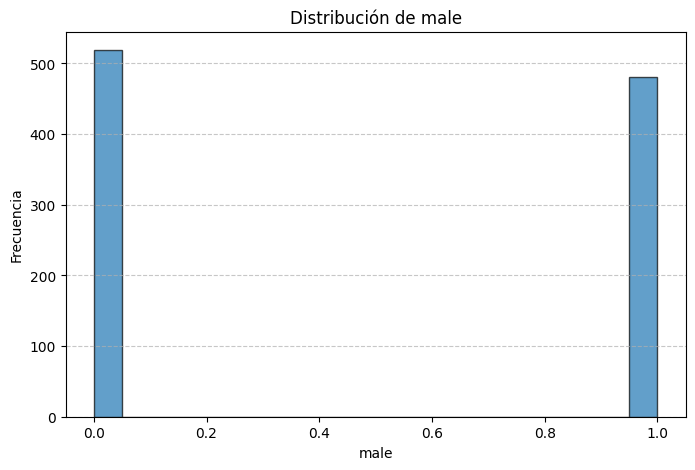

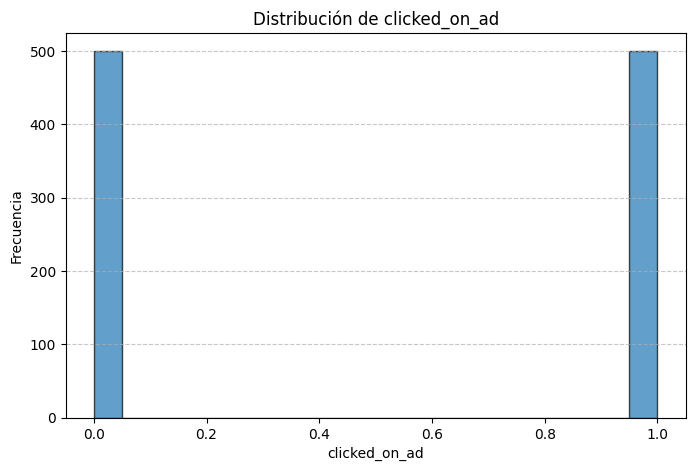

In [7]:
import matplotlib.pyplot as plt

# Seleccionar las columnas numéricas del dataset
columnas_numericas = data_limpio.select_dtypes(include=['int64', 'float64']).columns

# Crear histogramas para cada columna numérica
print("Análisis univariante: Histogramas de columnas numéricas")
for columna in columnas_numericas:
    plt.figure(figsize=(8, 5))
    plt.hist(data_limpio[columna], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f"Distribución de {columna}")
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


### Ejercicio 7

Muestra las correlaciones de las variables continuas con un "PairPlot" y emplea como codigo de color la variable target. [Esto es otra forma de hacer un bivariante y un multivariante a la vez]. Para ello como argumento del pairplot de seaborn usa el dataframe de train (no la matriz de correlación)

<Figure size 1200x800 with 0 Axes>

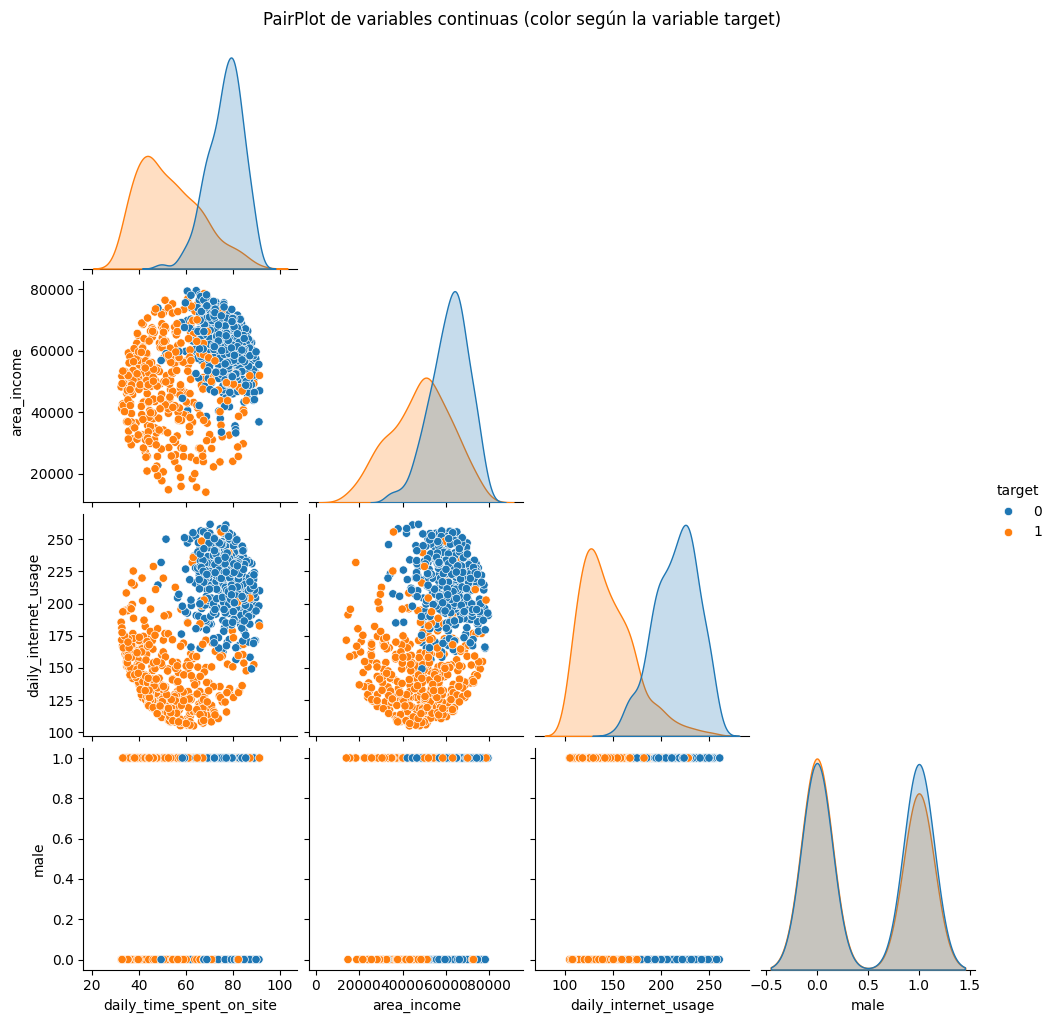

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame solo con las columnas numéricas y la variable target
train_numeric = X_train.select_dtypes(include=['int64', 'float64'])
train_numeric['target'] = y_train  # Agregar la variable target al DataFrame

# Generar el PairPlot
plt.figure(figsize=(12, 8))
sns.pairplot(data=train_numeric, hue='target', diag_kind='kde', corner=True)
plt.suptitle("PairPlot de variables continuas (color según la variable target)", y=1.02)
plt.show()


### Ejercicio 8

Fijándote en la diagonal principal del gráfico anterior haz una selecció de features:

In [10]:
# Selección de features basada en el análisis de gráficos
features_seleccionadas = ['daily_time_spent_on_site', 'daily_internet_usage', 'male']

# Crear nuevos conjuntos de datos con las features seleccionadas
X_train_seleccionado = X_train[features_seleccionadas]
X_test_seleccionado = X_test[features_seleccionadas]

# Mostrar las dimensiones de los conjuntos seleccionados
print("Nuevas dimensiones tras la selección de features:")
print(f"X_train_seleccionado: {X_train_seleccionado.shape}")
print(f"X_test_seleccionado: {X_test_seleccionado.shape}")

# Verificar las primeras filas del conjunto seleccionado
print("\nPrimeras filas del conjunto X_train_seleccionado:")
print(X_train_seleccionado.head())


Nuevas dimensiones tras la selección de features:
X_train_seleccionado: (800, 3)
X_test_seleccionado: (200, 3)

Primeras filas del conjunto X_train_seleccionado:
     daily_time_spent_on_site  daily_internet_usage  male
29                      76.02                209.82     0
535                     78.76                208.02     1
695                     73.49                244.23     0
557                     79.67                226.79     0
836                     49.21                115.60     0
